## Submission 2 (Applied Statistics)

By: **Gargeya Sharma** \
MSc Artificial Intelligence \
220278025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.integrate import quad

plt.rcParams["figure.dpi"] = 100

### Answer 1

In [2]:
def beta_measure(a,b):
    beta_v = beta(3,7)
    return beta_v.cdf(b) - beta_v.cdf(a)

In [3]:
pm01 = beta_measure(0,1)
print(f"a.) Probability Mass of the Interval [0,1] under the probability measure Beta (3,7) is {pm01}")
pm00 = beta_measure(0,0)
print(f"b.) Probability Mass of the Interval [0,0] under the probability measure Beta (3,7) is {pm00}")
pm2575 = beta_measure(0.25,0.75)
print(f"c.) Probability Mass of the Interval [0.25,0.75] under the probability measure Beta (3,7) is {pm2575}")
pm050 = beta_measure(0, 0.5)
print(f"d.) Probability Mass of the Interval [0,0.5] under the probability measure Beta (3,7) is {pm050}")
pm501 = beta_measure(0.5,1)
print(f"e.) Probability Mass of the Interval [0.5,1] under the probability measure Beta (3,7) is {pm501}")

a.) Probability Mass of the Interval [0,1] under the probability measure Beta (3,7) is 1.0
b.) Probability Mass of the Interval [0,0] under the probability measure Beta (3,7) is 0.0
c.) Probability Mass of the Interval [0.25,0.75] under the probability measure Beta (3,7) is 0.599334716796875
d.) Probability Mass of the Interval [0,0.5] under the probability measure Beta (3,7) is 0.91015625
e.) Probability Mass of the Interval [0.5,1] under the probability measure Beta (3,7) is 0.08984375


In [4]:
x = np.linspace(0, 1, 100)
b_dist = beta(3,7).pdf(x)

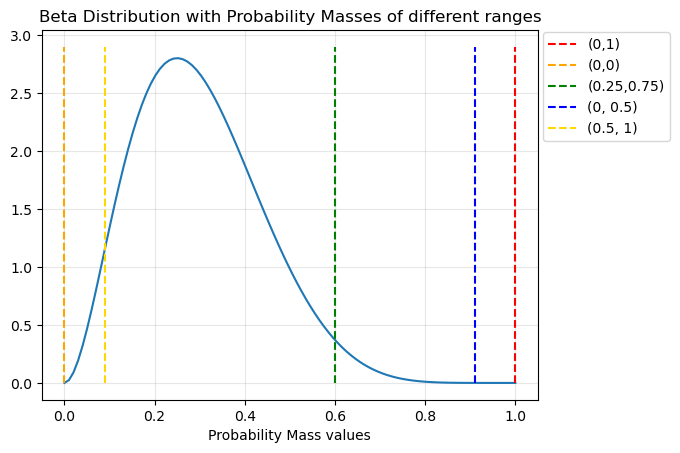

In [5]:
colors = ['r', 'orange', 'green', 'blue', 'gold']
p_mass = [pm01, pm00, pm2575, pm050, pm501]
ranges = ["(0,1)", "(0,0)", "(0.25,0.75)", "(0, 0.5)", "(0.5, 1)"]

plt.plot(x,b_dist)
for i in range(5):
    plt.vlines(p_mass[i], 0, 2.9, color=colors[i], label=ranges[i], linestyles="dashed")
plt.grid(True, alpha=0.3)
plt.xlabel("Probability Mass values")
plt.legend(loc=(1.01,0.7))
plt.title("Beta Distribution with Probability Masses of different ranges")
plt.show()

---

### Answer 2

In [6]:
def beta_pdf(x):
    return beta(3,7).pdf(x)

**a)** Range => (0, 1)

In [7]:
## Answer (a)
integral = quad(beta_pdf, 0, 1)
result = integral[0]
print(result)

1.0


**b)** Range => (0, 0)

In [8]:
## Answer (b)
integral = quad(beta_pdf, 0, 0)
result = integral[0]
print(result)

0.0


**c)** Range => (1/4, 3/4)

In [9]:
## Answer (c)
integral = quad(beta_pdf, 1/4, 3/4)
result = integral[0]
print(result)

0.5993347167968751


**d)** Range => (0, 1/2)

In [10]:
## Answer (d)
integral = quad(beta_pdf, 0, 1/2)
result = integral[0]
print(result)

0.9101562499999999


**e)** Range => (1/2, 1)

In [11]:
## Answer (e)
integral = quad(beta_pdf, 1/2, 1)
result = integral[0]
print(result)

0.08984374999999997


*Compare your answers with those of the previous question.*

Values in the first answer are exactly the same as the second ones. This is due to the fact that both of the analysis is one and the same thing. The cumulative density function **(cdf)** is the integral of probability density function **(pdf)**. So, when we are integrating the pdf values to find the probability mass values at the particular range, that is exactly what we are getting from the points on the cumulative density function curve over the same range.

---

### Answer 3

In [12]:
beta37 = beta(3,7)
beta73 = beta(7,3)

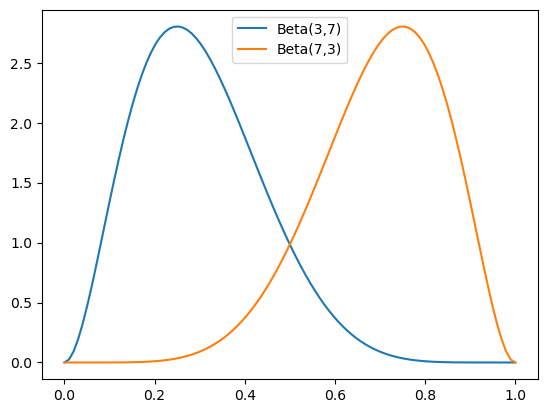

In [13]:
plt.plot(x, beta37.pdf(x), label="Beta(3,7)")
plt.plot(x, beta73.pdf(x), label="Beta(7,3)")
plt.legend()
plt.show()

**Support for the Beta distribution**

Support for the Beta distribution: x belongs to [0,1]. Therefore,

Support of the **Beta(3,7)** distribution: **[0,1]** \
Support of the **Beta(7,3)** distribution: **[0,1]**

Support of the Sum of distribution, **Beta(3,7) + Beta(7,3)** will be the sum of both of their support: [0+0, 1+1] => **[0,2]**


In [14]:
## Function to implement the integrand of the Integral

def f12():
    f1 = lambda x: beta37.pdf(x)
    f2 = lambda x: beta73.pdf(x)
    return lambda x,t: f1(x)*f2(t-x)

In [15]:
def sum_beta_dist(t):
    f1_2 = f12()
    integral = quad(f1_2, -np.inf, np.inf, args=(t,))
    return integral[0]

In [16]:
## (0,2) as the parameters in np.linspace to get 't' values are the support of summation of beta distribution mentioned above.

t = np.linspace(0,2,100)
f1_2_t = list()
for i in t:
    f1_2_t.append(sum_beta_dist(i))

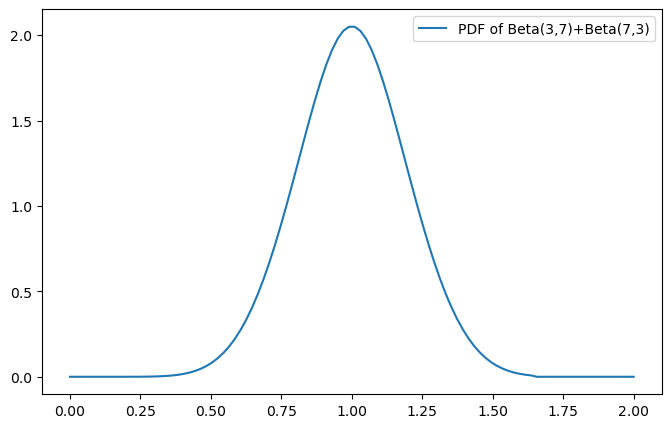

In [17]:
plt.figure(figsize=(8,5))
plt.plot(t, f1_2_t, label="PDF of Beta(3,7)+Beta(7,3)")
plt.legend()
plt.show()

In [18]:
N = 10000
rvb37 = beta37.rvs(N)  ## 'N' Random values from the Beta(3,7) distribution
rvb73 = beta73.rvs(N)  ## 'N' Random values from the Beta(7,3) distribution

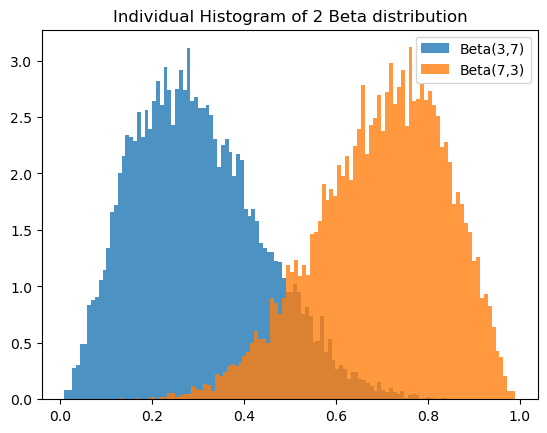

In [19]:
plt.hist(rvb37,bins=int(np.sqrt(N)), label="Beta(3,7)", alpha=0.8, density=True)
plt.hist(rvb73,bins=int(np.sqrt(N)), label = "Beta(7,3)", alpha=0.8, density=True)
plt.legend()
plt.title("Individual Histogram of 2 Beta distribution")
plt.show()

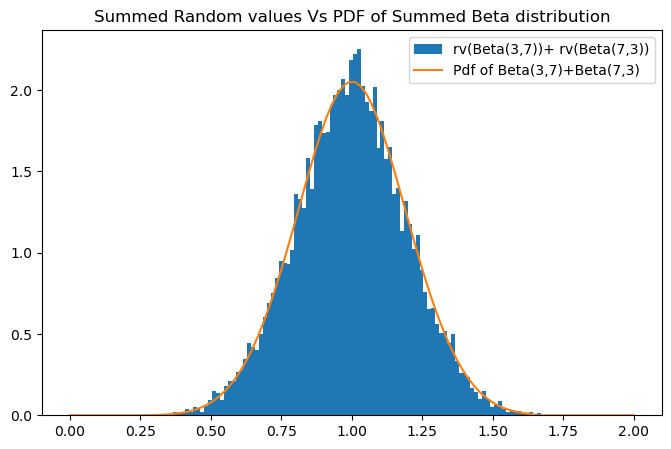

In [20]:
plt.figure(figsize=(8,5))
plt.hist(rvb37+rvb73, bins=int(np.sqrt(N)), label="rv(Beta(3,7))+ rv(Beta(7,3))", density=True)
plt.plot(t, f1_2_t, label="Pdf of Beta(3,7)+Beta(7,3)")
plt.legend()
plt.title("Summed Random values Vs PDF of Summed Beta distribution")
plt.show()

*Observation*

I observe that the sum of random values(rv) from the different beta distribution and *pdf* curve achieved from the integral above are exactly fitting each other. This signifies that the samples values in the resultant histogram have been taken from the same probability density function which clearly proves the mathematical ground of summing two distribution and how their *pdf* evolve with each other.

---

### Answer 4

In [21]:
!pip install pandas-datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


In [22]:
import pandas_datareader as data
my_data = data.DataReader('MSFT', 'yahoo', '2012-11-02', '2022-11-02')

In [23]:
my_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-11-02,29.770000,29.330000,29.590000,29.500000,57131600.0,24.194614
2012-11-05,29.740000,29.330000,29.620001,29.629999,38070800.0,24.301245
2012-11-06,30.200001,29.610001,29.820000,29.860001,43401500.0,24.489878
2012-11-07,29.830000,29.049999,29.530001,29.080000,57871800.0,23.850151
2012-11-08,29.370001,28.799999,29.120001,28.809999,49841800.0,23.628708
...,...,...,...,...,...,...
2022-10-27,233.690002,225.779999,231.039993,226.750000,40424600.0,226.750000
2022-10-28,236.600006,226.050003,226.240005,235.869995,40647700.0,235.869995
2022-10-31,234.919998,231.149994,233.759995,232.130005,28357300.0,232.130005


In [24]:
close = my_data["Close"]

In [25]:
ret = close.copy()[1:]
ret[:] = ((close[1:].values/close[:-1].values)-1)*100

In [26]:
ret.shape

(2517,)

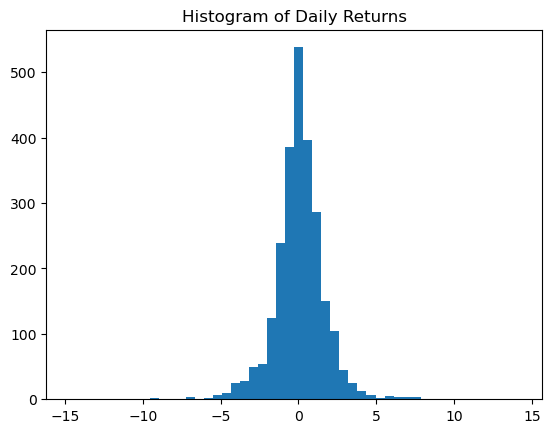

In [27]:
plt.hist(ret, bins=int(np.sqrt(ret.shape[0])))
plt.title("Histogram of Daily Returns")
plt.show()

In [28]:
print(f"99% of the daily rates lies between ({np.quantile(ret, 0.005):.3f},{np.quantile(ret, 0.995):.3f})")

99% of the daily rates lies between (-5.387,6.514)


In [29]:
print(f"The support of the daily return is: [{-np.inf}, {np.inf}] => R")

The support of the daily return is: [-inf, inf] => R


*Distribution Family Selection*

It is a **symmetric** distribution which looks a lot similar to a **normal distribution** without any fat tails or positive excess kurtosis. But after experimentation with the normal distribution (reference at the end of the notebook), best fit estimators are not able to properly justify the distribution. So, I explored other distributions with support (**R**) and found **laplace distribution** to fit the daily returns distributions very well. **So, my choice for the family of continuous distribution for this case is laplace distribution.**  

In [30]:
from scipy.stats import norm, laplace
from statsmodels.graphics.gofplots import qqplot

In [31]:
params = laplace.fit(ret)

In [32]:
## Params contains (best fit mean, best fit std) for the daily return distribution

params

(0.07165654349059469, 1.1466747774881987)

In [33]:
x = np.linspace(-7,7,100)
l_dist = laplace.pdf(x, params[0], params[1])

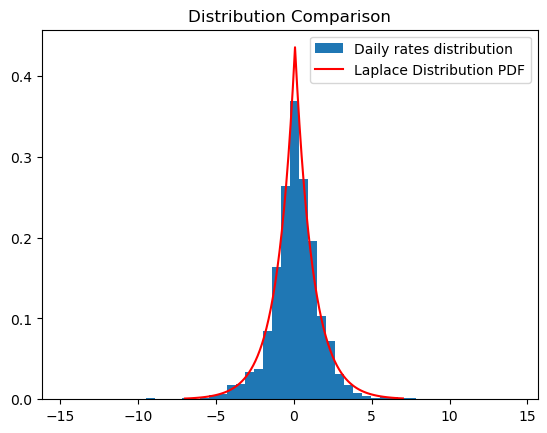

In [34]:
plt.hist(ret, bins=int(np.sqrt(ret.shape[0])), density=True, label="Daily rates distribution")
plt.plot(x, l_dist, color="red", label="Laplace Distribution PDF")
plt.title("Distribution Comparison")
plt.legend()
plt.show()

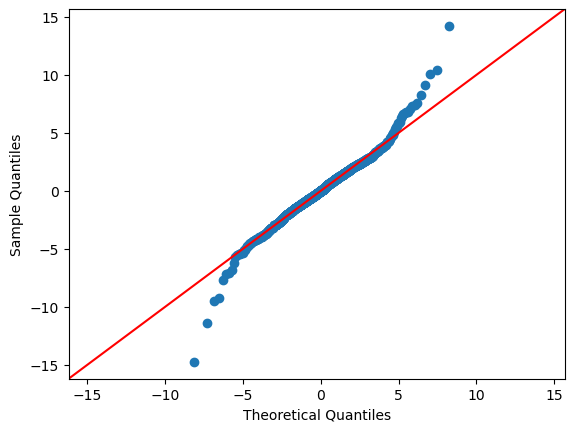

In [35]:
fig = qqplot(ret, dist=laplace, loc=params[0], scale=params[1], line='45')
plt.show()

*Comment on the QQ Plot fit*

QQ plot in statistics is used to compare probabilities of two distributions by plotting their quantiles against each other. The red line shows the perfect match reference line and as much as the points align on top of that line shows higher similarity. In our case, as mentioned above 99% of the data (except the outliers) lies in the range **(-5.3, 6.5)**, so if we look at the values between that range, its perfectly aligning on top of the perfect-fit (red) line. Outliers are anomalies here and hence are not related to each other. This is a pretty good fit on our 'daily return' values.

---

#### Experimentation Before I reached to "laplace" distribution as a conclusion

In [36]:
params = norm.fit(ret)
x = np.linspace(-7,7,100)
n_dist = norm.pdf(x, params[0], params[1])


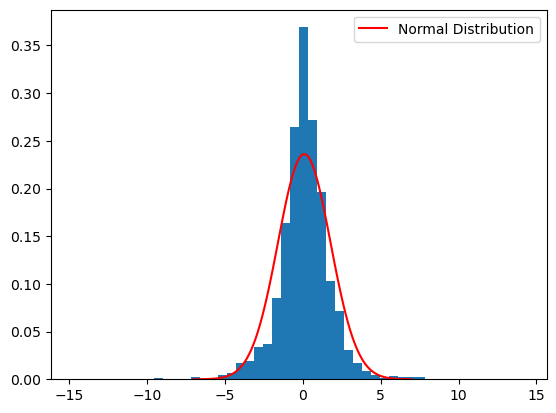

In [37]:
plt.hist(ret, bins=int(np.sqrt(ret.shape[0])), density=True)
plt.plot(x, n_dist, color="red", label="Normal Distribution")
plt.legend()
plt.show()

In [38]:
params

(0.0941623373649645, 1.6892942392753632)

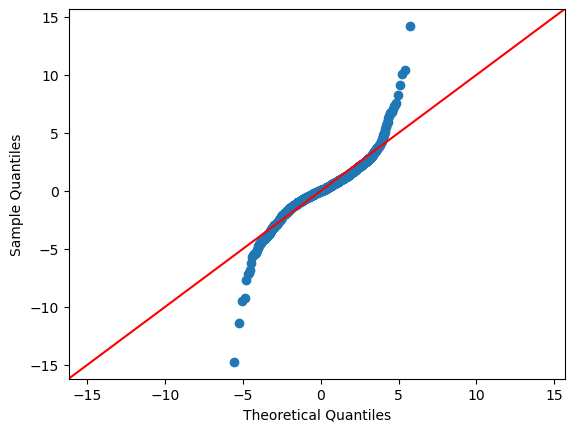

In [39]:
fig = qqplot(ret, dist=norm, loc=params[0], scale=params[1], line='45')
plt.show()

---